🎯 Desafio dia 89 — Feedback de Produtos em E-commerce

📂 Dataset: desafio_dia_89_feedback_ecommerce.csv

🔍 Contexto: O setor de pós-venda de um e-commerce deseja cruzar dados de avaliação de produtos com tempo de entrega e ocorrência de reembolsos. O objetivo é identificar padrões que possam reduzir insatisfação e aumentar a fidelidade.

🛠️ Tarefas do desafio

🧹 Tratamento de dados
- Substitua os valores ausentes em tempo_entrega_dias pelo valor mediano agrupado por forma_envio.

- Substitua os valores ausentes em avaliacao pelo valor mais comum (moda) dentro de cada departamento.

📊 Análise geral
- Existe relação entre o tipo de entrega e o número de reembolsos? (faça um crosstab e analise)

- Qual o tempo médio de entrega para produtos avaliados com 1 ou 2 estrelas?

📈 Visualização de dados
- Construa um boxplot comparando tempo_entrega_dias por forma_envio.

🤖 Machine Learning - Classificação Binária
- Crie um modelo para prever se um cliente solicitará reembolso com base em:

departamento, forma_envio, tempo_entrega_dias, avaliacao

Use:

train_test_split

get_dummies

RandomForestClassifier

Avalie com classification_report (para ir além do accuracy_score e aprender mais sobre precisão, recall e f1-score)



In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [40]:
df = pd.read_csv("desafio_dia_89_feedback_ecommerce.csv")
df.head()

,id_cliente,departamento,forma_envio,tempo_entrega_dias,avaliacao,reembolso
0,18478,Moda,Expressa,5.2,4.0,Não
1,16276,Alimentos,Econômica,6.9,4.0,Não
2,12925,Esporte,Econômica,8.5,1.0,Não
3,18726,Esporte,Econômica,6.7,2.0,Não
4,15419,Eletrônicos,Expressa,4.0,3.0,Não


In [6]:
#Substitua os valores ausentes em tempo_entrega_dias pelo valor mediano agrupado por forma_envio.
df["tempo_entrega_dias"] = df["tempo_entrega_dias"].fillna(
    df.groupby("forma_envio")["tempo_entrega_dias"].transform("median")
)
df["tempo_entrega_dias"].isna().sum()

0

In [8]:
#Substitua os valores ausentes em avaliacao pelo valor mais comum (moda) dentro de cada departamento.
df["avaliacao"] = df["avaliacao"].fillna(
    df.groupby("departamento")["avaliacao"].transform(lambda x: x.mode()[0])
)
df["avaliacao"].isna().sum()

0

In [15]:
#Existe relação entre o tipo de entrega e o número de reembolsos? (faça um crosstab e analise)
rel_tipo_entrega_reembolsol = pd.crosstab(df['forma_envio'], df['reembolso'])
print(rel_tipo_entrega_reembolsol)

reembolso    Não  Sim
forma_envio          
Econômica    128   32
Expressa     141   23
Normal       147   29


In [16]:
#Qual o tempo médio de entrega para produtos avaliados com 1 ou 2 estrelas?
tempo_medio_entrega_produtos_avaliados12 = df[df["avaliacao"].isin([1, 2])]["tempo_entrega_dias"].mean()
print(tempo_medio_entrega_produtos_avaliados12)

7.019540229885058


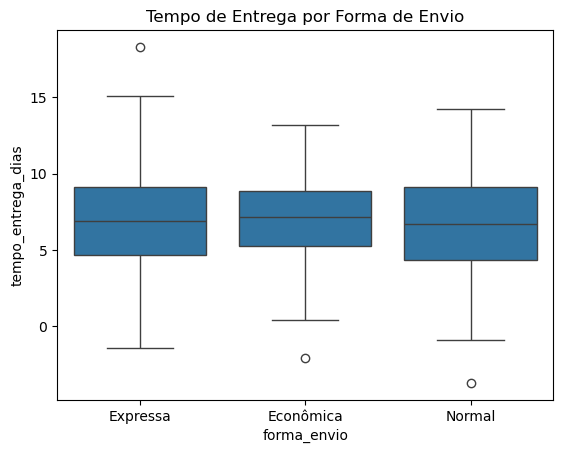

In [19]:
#construa um boxplot comparando tempo_entrega_dias por forma_envio.
sns.boxplot(data=df, x="forma_envio", y="tempo_entrega_dias")
plt.title("Tempo de Entrega por Forma de Envio")
plt.show()

In [41]:
#Crie um modelo para prever se um cliente solicitará reembolso com base em:
df["reembolso"] = df["reembolso"].map({"Sim": 1, "Não": 0})

X = df[["departamento", "forma_envio", "tempo_entrega_dias", "avaliacao"]]
y = df["reembolso"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       124
           1       0.29      0.08      0.12        26

    accuracy                           0.81       150
   macro avg       0.56      0.52      0.51       150
weighted avg       0.74      0.81      0.76       150

0.8066666666666666
